In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Lokasi file
file_path = "data/obesity.csv"
# Memuat dataset
df = pd.read_csv(file_path)

print("--- 1. Import & Load Dataset ---")
print("\n5 Baris Pertama Dataset:")
df.head()

--- 1. Import & Load Dataset ---

5 Baris Pertama Dataset:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:
print("\nInformasi Dataset (Tipe Data dan Non-Null Counts):")
df.info()


Informasi Dataset (Tipe Data dan Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-nu

In [13]:
# Cek bentuk dataset
print("\nBentuk Dataset (Baris, Kolom):", df.shape)

# Cek deskripsi statistik
print("\nDeskripsi Statistik (Semua Fitur):")
df.describe(include='all')


Bentuk Dataset (Baris, Kolom): (2111, 17)

Deskripsi Statistik (Semua Fitur):


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [14]:
print("\nJumlah Missing Values:")
df.isnull().sum()


Jumlah Missing Values:


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [15]:
# Cek duplikasi data
duplicates = df.duplicated().sum()
print(f"\nJumlah Duplikasi Data: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplikasi telah dihapus.")
    print("Bentuk Dataset Setelah Duplikasi Dihapus:", df.shape)


Jumlah Duplikasi Data: 24
Duplikasi telah dihapus.
Bentuk Dataset Setelah Duplikasi Dihapus: (2087, 17)


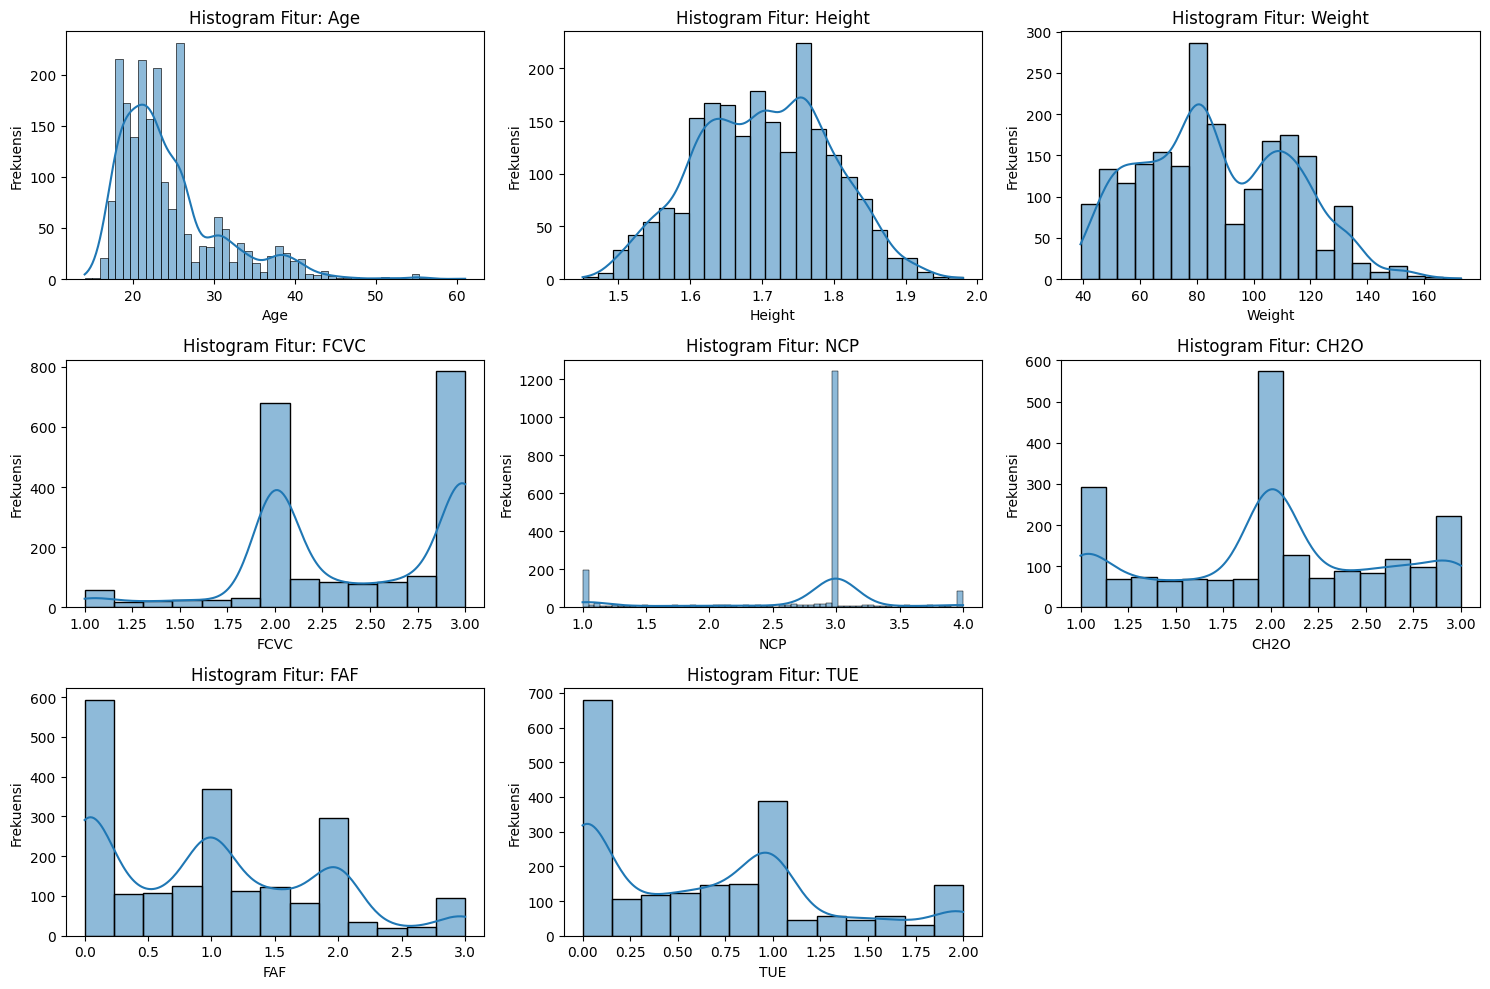

C:\Users\ACER\AppData\Local\Temp\ipykernel_13400\508285045.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[target_column], order=df[target_column].value_counts().index, palette='viridis')


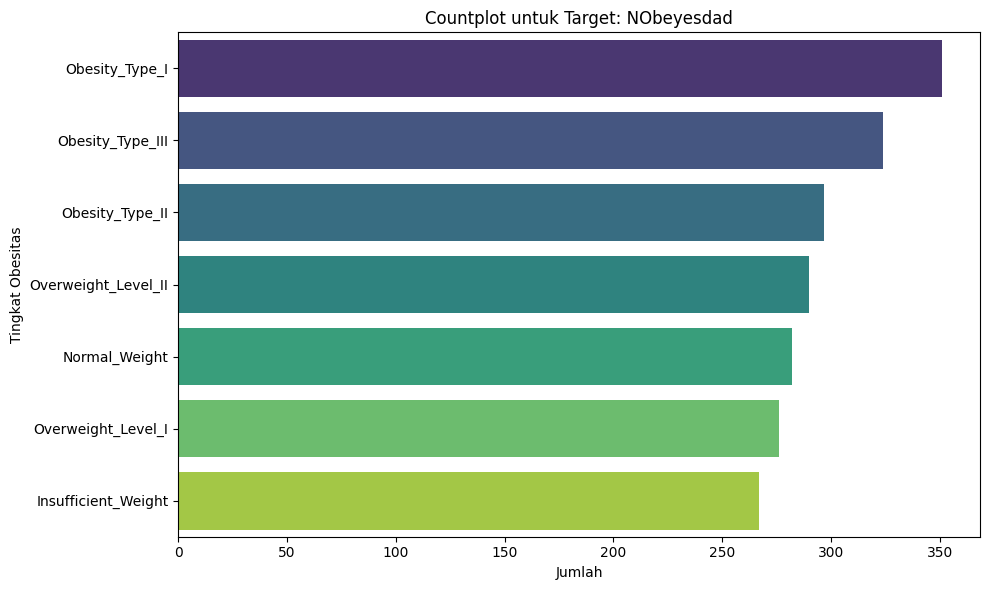

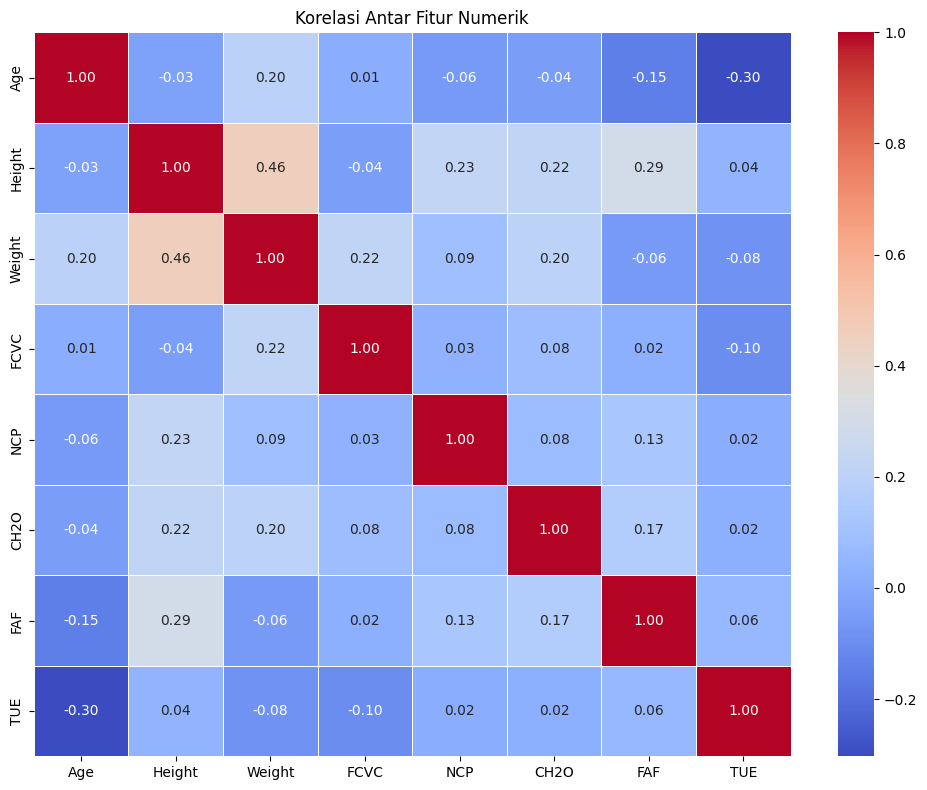

In [16]:
# Identifikasi fitur numerik dan kategorikal
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_column = 'NObeyesdad'

# Visualisasi 1: Histogram untuk semua fitur numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()  

# Visualisasi 2: Countplot untuk target
plt.figure(figsize=(10, 6))
sns.countplot(y=df[target_column], order=df[target_column].value_counts().index, palette='viridis')
plt.title(f'Countplot untuk Target: {target_column}')
plt.xlabel('Jumlah')
plt.ylabel('Tingkat Obesitas')
plt.tight_layout()
plt.show()  

# Cek korelasi antar fitur numerik (heatmap)
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi Antar Fitur Numerik')
plt.tight_layout()
plt.show() 

In [22]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_   train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Preprocessor untuk fitur numerik: Normalisasi (StandardScaler)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessor untuk fitur kategorikal: Encoding (OneHotEncoder)
categorical_transformer = Pipeline(steps=[
  
  
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gabungkan preprocessors menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False # Untuk output nama kolom yang lebih bersih
)
preprocessor.set_output(transform="pandas")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2109387069.py, line 7)

In [18]:
# Definisikan model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Buat Pipeline: Preprocessing + Model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train model pada data training
print("Melatih model...")
pipeline.fit(X_train, y_train)
print("Model selesai dilatih.")

# Prediksi pada data test
y_pred = pipeline.predict(X_test)

Melatih model...
Model selesai dilatih.



--- 5. Evaluasi Model ---
Accuracy Model (RandomForest): 0.9378

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        53
      Normal_Weight       0.78      0.91      0.84        57
     Obesity_Type_I       0.99      0.97      0.98        70
    Obesity_Type_II       1.00      1.00      1.00        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.91      0.87      0.89        55
Overweight_Level_II       0.91      0.86      0.88        58

           accuracy                           0.94       418
          macro avg       0.94      0.94      0.94       418
       weighted avg       0.94      0.94      0.94       418



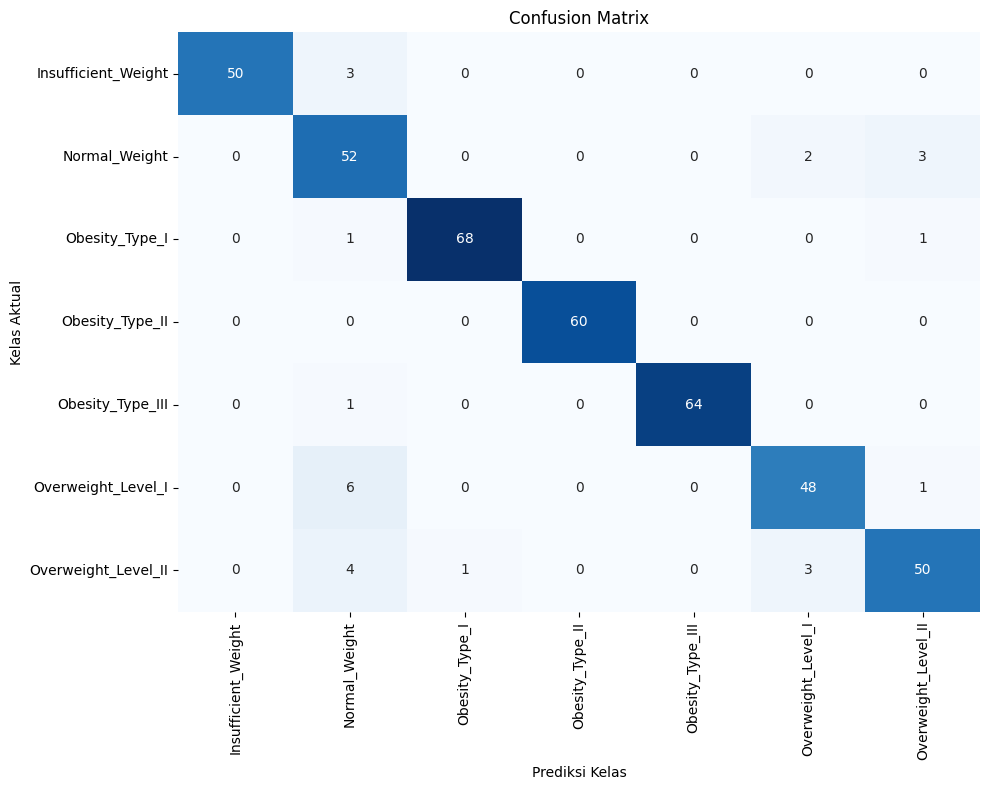


Feature Importance (Top 10):
Weight           0.273263
Age              0.094382
FCVC             0.085312
Height           0.077979
NCP              0.051711
FAF              0.049592
TUE              0.046541
CH2O             0.044848
Gender_Female    0.036071
Gender_Male      0.032985
dtype: float64


C:\Users\ACER\AppData\Local\Temp\ipykernel_13400\3662959679.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_series.head(10).values, y=importance_series.head(10).index, palette='viridis')


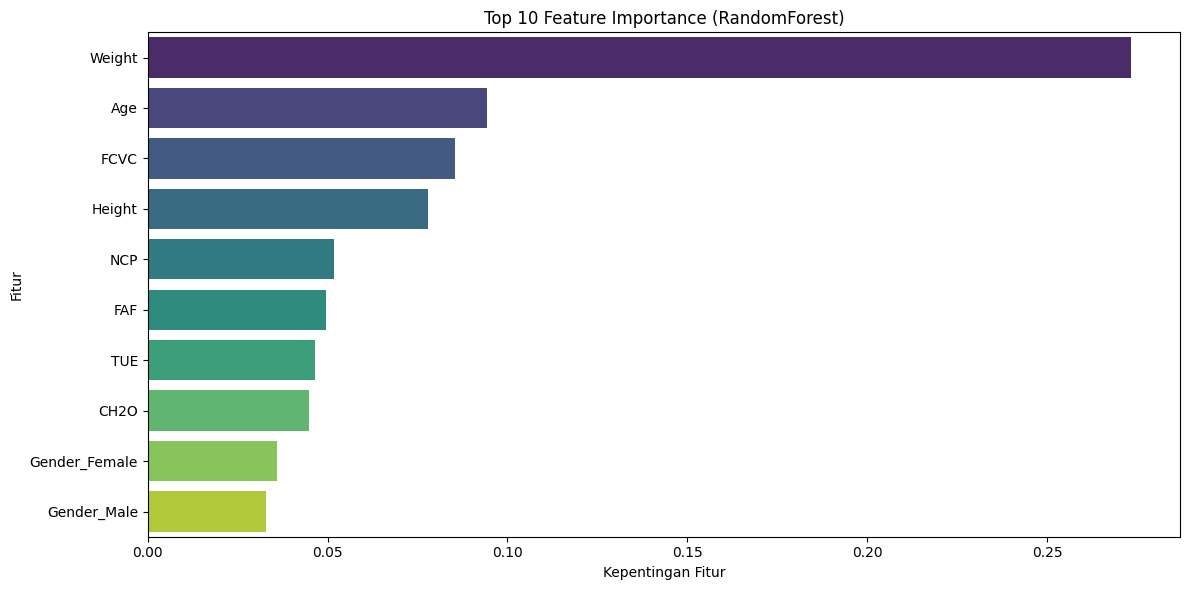

In [19]:
print("\n--- 5. Evaluasi Model ---")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Model (RandomForest): {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix (visualisasi heatmap)
cm = confusion_matrix(y_test, y_pred)
class_names = pipeline.classes_
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi Kelas')
plt.ylabel('Kelas Aktual')
plt.tight_layout()
plt.show()  

# Feature Importance
feature_importances = pipeline['classifier'].feature_importances_
feature_names_processed = pipeline['preprocessor'].get_feature_names_out()
importance_series = pd.Series(feature_importances, index=feature_names_processed).sort_values(ascending=False)

# Tampilkan top 10 feature importance
print("\nFeature Importance (Top 10):")
print(importance_series.head(10))

# Visualisasi Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_series.head(10).values, y=importance_series.head(10).index, palette='viridis')
plt.title('Top 10 Feature Importance (RandomForest)')
plt.xlabel('Kepentingan Fitur')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()  # Opsional

In [20]:
# Simpan pipeline model ke file menggunakan joblib.dump
model_filename = 'model_obesity.pkl'
joblib.dump(pipeline, model_filename)
print(f"\n--- 6. Simpan Model ---")
print(f"Model Pipeline (RandomForestClassifier) telah disimpan ke file: {model_filename}")


--- 6. Simpan Model ---
Model Pipeline (RandomForestClassifier) telah disimpan ke file: model_obesity.pkl
